# Phân loại thóc dựa vào ảnh chụp của nó

In [1]:
import numpy as np
import os
%matplotlib inline  
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

## Thống kê dữ liệu ảnh trong mỗi lớp
Điều kiện lý thưởng là: số mẫu của mỗi lớp bằng nhau

In [2]:
dataDir='./data/'
classes=['BC15', 'BQ10', 'NH92']

In [3]:
os.walk(dataDir)

<generator object walk at 0x7ff34b714a98>

In [4]:
# Hàm thống kê số lượng ảnh của mỗi lớp
def statistic(dataDir):
    label = []
    num_images = []
    for lab in os.listdir(dataDir):
        label.append(lab)
        files=os.listdir(os.path.join(dataDir, lab))
        c=len(files)
        num_images.append(c)
    return label, num_images

In [5]:
# Hiển thị thống kê
labels, num_images = statistic(dataDir)
print(labels)
print(num_images)

['1_BQ10', '0_BC15', '2_NH92']
[96, 96, 96]


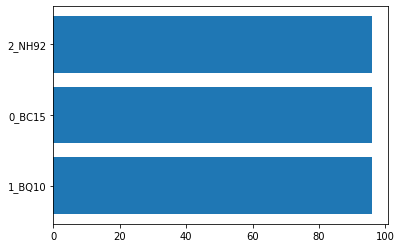

Total images: 288


In [6]:
y_pos = np.arange(len(labels))
plt.barh(y_pos, num_images, align='center')
plt.yticks(y_pos, labels)
plt.show()
print('Total images: %d' %(sum(num_images)))

## Tạo danh sách train và test
Tập valid nếu cần sẽ trích từ tập train

In [8]:
def LoadData(dataDir,new_size=None):
    if not new_size is None:
        img_rows, img_cols = new_size
    classes=[]
    for _,dirs,_ in os.walk(dataDir):
        classes=dirs
        break  
    num_classes=len(classes)    
    ValidPercent=30
    X_tr=[]
    Y_tr=[]
    X_te=[]
    Y_te=[]    
    for idx,cl in enumerate(classes):
        for _,_,files in os.walk(dataDir+cl+'/'):               
            l=len(files)
            for f in files:
                r=np.random.randint(100)
                img_path=dataDir+cl+'/'+f
                img=cv.imread(img_path)
                img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
                if not new_size is None:
                    img=cv.resize(img,(img_rows,img_cols))
                if (r>ValidPercent):
                    X_tr.append(img)
                    Y_tr.append(int(cl[0]))  
                else:
                    X_te.append(img)
                    Y_te.append(int(cl[0]))                      
#     X_tr=np.array(X_tr)
#     Y_tr=np.array(Y_tr)
#     X_va=np.array(X_va)
#     Y_va=np.array(Y_va)
    return X_tr, Y_tr, X_te, Y_te

In [9]:
# new_size=(224,224)
img_train,label_train, img_test, label_test=LoadData(dataDir,None)

In [10]:
idxs=np.random.permutation(len(img_train))
print(idxs)

[ 71 160  82  38 141  17  77 128  31   8 152 187  68 127 158 159  23   9
  41 185   2  49  91 182  63  35  57  85   5  92 178 169 108 157 170 146
  94  46  95  76 116  58 150 104  26  70 124 125 148 112  73  45 166 138
  53  84  89 105 115  98 183 106 133 122 136 179 186  48  87 184  83 107
  88  93 163  30  75  13  80  25  43 189 103 120 101 137  44 168 151 117
  79   7  61  34  20  10 167 188  12 114  33 165  78  15 174 123 135  99
 143 176 177   3 100  60  72 130  18 129  55 140 145 153  29 118  54 161
 149 139 180 111  40  52  66  67  21  74  42 110  19 162  32 102 131 121
  51 142  97  65 172 171 154 126 134 113  24 181  64 147  37 132  50  59
   4  62 156  90 144  96  28  69   1 155  14  27  36  81  86  47  16 109
 119  22 175 164 173   6   0  11  56  39]


img for train: 190
label for train: 190
img for test: 98
label for test: 98


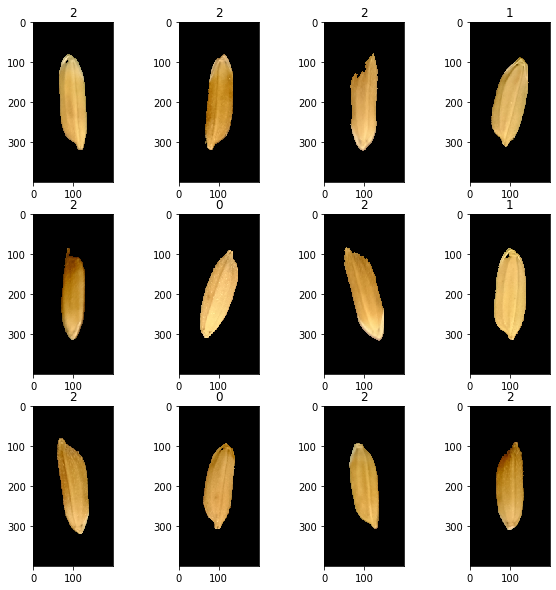

In [11]:
"""
Hiển thị một số thông tin của tập dữ liệu
"""
print("img for train: %d" % (len(img_train)))
print("label for train: %d" % (len(label_train)))

print("img for test: %d" % (len(img_test)))
print("label for test: %d" % (len(label_test)))

"""
Hiển thị một số ảnh trong tập huấn luyện
"""

idxs=np.random.permutation(len(img_train))
plt.figure(figsize = (10,10))
for i in range(12):  # Lấy ngẫu nhiên 12 mẫu trong tập train
    idx=idxs[i]
    plt.subplot(3,4,i+1)
    plt.imshow(img_train[idx],norm=NoNorm())
    #plt.title(labels[label_train[idx]])
    plt.title(label_train[idx])
plt.show()


## Trích đặc trưng

In [12]:
from skimage.feature import hog
# Định nghĩa hàm trích đặc trưng cho từng ảnh
def get_hog_features(img, orient=8, pix_per_cell=16, cell_per_block=4,vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient,
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),                                  
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  transform_sqrt=True,
                                  visualize=vis, feature_vector=feature_vec,multichannel=True)
        return features, hog_image    
    else: # Otherwise call with one output     
        features = hog(img, orientations=orient,
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, visualize=vis, feature_vector=feature_vec)
                   #,multichannel=True)
        return features

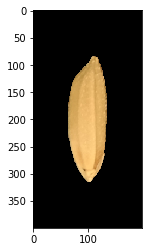

In [13]:
plt.imshow(img_train[0],norm=NoNorm())

In [14]:
feature, img_hogg =get_hog_features(img_train[0], vis=True)

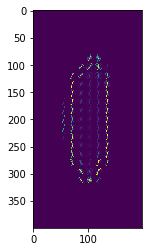

In [15]:
plt.imshow(img_hogg,norm=NoNorm())

In [16]:
#trích đặc trưng cho tập train và test
feat_train=[]
for img in img_train:
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    feat_HOG=get_hog_features(gray)
    feat_train.append(feat_HOG)

feat_test=[]
for img in img_test:
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    feat_HOG=get_hog_features(gray)
    feat_test.append(feat_HOG)

# chuyên qua kiểu numpy
X_hog_tr=np.array(feat_train)
Y_tr=np.array(label_train)
X_hog_te=np.array(feat_test)
Y_te=np.array(label_test)

In [17]:
print("train data: " + str(X_hog_tr.shape))
print("train label: " + str(Y_tr.shape))

print("test data: " + str(X_hog_te.shape))
print("test label: " + str(Y_te.shape))

train data: (190, 25344)
train label: (190,)
test data: (98, 25344)
test label: (98,)


## Phân lớp

In [18]:
# Huấn luyện SVM
from sklearn.svm import SVC, LinearSVC
model_svm = SVC(kernel="linear", C=1.0)
model_svm.fit(X_hog_tr,Y_tr)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
# Kiểm thử mô hình SVM
y_predict = model_svm.predict(X_hog_te)
print ('Độ chính xác: ',model_svm.score(X_hog_te,Y_te))

Độ chính xác:  0.7448979591836735


## Sử dụng đặc trưng Color histogram

In [20]:
# feature-descriptor-3: Color Histogram
def fd_histogram(image,bins=16, mask=None):
    # convert the image to HSV color-space
    img_hsv = cv.cvtColor(image, cv.COLOR_RGB2HSV)
    # compute the color histogram
    hist  = cv.calcHist([img_hsv], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv.normalize(hist, hist)
    # return the histogram
    return hist.flatten()

In [21]:
#trích đặc trưng cho tập train và test
bins=16
feat_train=[]
for img in img_train:
    feat_chis=fd_histogram(img,bins)
    feat_train.append(feat_chis)

feat_test=[]
for img in img_test:
    feat_chis=fd_histogram(img,bins)
    feat_test.append(feat_chis)
    
# chuyên qua kiểu numpy
X_his_tr=np.array(feat_train)
X_his_te=np.array(feat_test)
Y_tr=np.array(label_train)
Y_te=np.array(label_test)

print("train data: " + str(X_his_tr.shape))
print("train label: " + str(Y_tr.shape))

print("test data: " + str(X_his_te.shape))
print("test label: " + str(Y_te.shape))

train data: (190, 4096)
train label: (190,)
test data: (98, 4096)
test label: (98,)


In [26]:
# Huấn luyện SVM
from sklearn.svm import SVC
model_svm = SVC(kernel="linear", C=1.0)
model_svm.fit(X_his_tr,Y_tr)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
# Kiểm thử mô hình SVM
y_predict = model_svm.predict(X_his_te)
print ('Độ chính xác: ',model_svm.score(X_his_te,Y_te))

Độ chính xác:  0.29591836734693877
